# LIBRARY IMPORT AND DATA PREPROCESSING

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report



In [2]:
#Load data

churn = pd.read_csv('/kaggle/input/customer-churn-dataset/customer_churn_dataset-training-master.csv')
churn

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.00,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.00,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.00,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.00,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.00,20.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
440828,449995.0,42.0,Male,54.0,15.0,1.0,3.0,Premium,Annual,716.38,8.0,0.0
440829,449996.0,25.0,Female,8.0,13.0,1.0,20.0,Premium,Annual,745.38,2.0,0.0
440830,449997.0,26.0,Male,35.0,27.0,1.0,5.0,Standard,Quarterly,977.31,9.0,0.0
440831,449998.0,28.0,Male,55.0,14.0,2.0,0.0,Standard,Quarterly,602.55,2.0,0.0


In [3]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB


In [4]:
#We do not need the customer id column so we can drop it
churn = churn.drop('CustomerID', axis=1)

In [5]:
churn.describe()

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000
mean,39.373153,31.256336,15.807494,3.604437,12.965722,631.616223,14.480868,0.567107
std,12.442369,17.255727,8.586242,3.070218,8.258063,240.803001,8.596208,0.495477
min,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,29.000000,16.000000,9.000000,1.000000,6.000000,480.000000,7.000000,0.000000
50%,39.000000,32.000000,16.000000,3.000000,12.000000,661.000000,14.000000,1.000000
75%,48.000000,46.000000,23.000000,6.000000,19.000000,830.000000,22.000000,1.000000
max,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


In [6]:
churn.isnull().sum()

Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64

In [7]:
#In every column we have only one null value, we can drop them

churn.dropna(inplace=True)

In [8]:
churn.isnull().sum()

Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64

In [9]:
churn.shape

(440832, 11)

In [10]:
#We have object columns so we have to deal with them
#First let's check the unique of object columns

for column in churn:
    if churn[column].dtypes=='object':
        print(f'{column}: {churn[column].unique()}')

Gender: ['Female' 'Male']
Subscription Type: ['Standard' 'Basic' 'Premium']
Contract Length: ['Annual' 'Monthly' 'Quarterly']


In [11]:
#Let's encode our gender column

churn['Gender'] = churn['Gender'].apply(lambda x: 1 if x=='Male' else 0)

In [12]:
#Let's use one hot encoding to columns which contains more than 2 unique values

churn_cleaned = pd.get_dummies(data=churn , columns=['Subscription Type', 'Contract Length'])
churn_cleaned

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn,Subscription Type_Basic,Subscription Type_Premium,Subscription Type_Standard,Contract Length_Annual,Contract Length_Monthly,Contract Length_Quarterly
0,30.0,0,39.0,14.0,5.0,18.0,932.00,17.0,1.0,0,0,1,1,0,0
1,65.0,0,49.0,1.0,10.0,8.0,557.00,6.0,1.0,1,0,0,0,1,0
2,55.0,0,14.0,4.0,6.0,18.0,185.00,3.0,1.0,1,0,0,0,0,1
3,58.0,1,38.0,21.0,7.0,7.0,396.00,29.0,1.0,0,0,1,0,1,0
4,23.0,1,32.0,20.0,5.0,8.0,617.00,20.0,1.0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440828,42.0,1,54.0,15.0,1.0,3.0,716.38,8.0,0.0,0,1,0,1,0,0
440829,25.0,0,8.0,13.0,1.0,20.0,745.38,2.0,0.0,0,1,0,1,0,0
440830,26.0,1,35.0,27.0,1.0,5.0,977.31,9.0,0.0,0,0,1,0,0,1
440831,28.0,1,55.0,14.0,2.0,0.0,602.55,2.0,0.0,0,0,1,0,0,1


***Now our data is nice and clean. Let's use make some visualization***

# VISUALIZATION

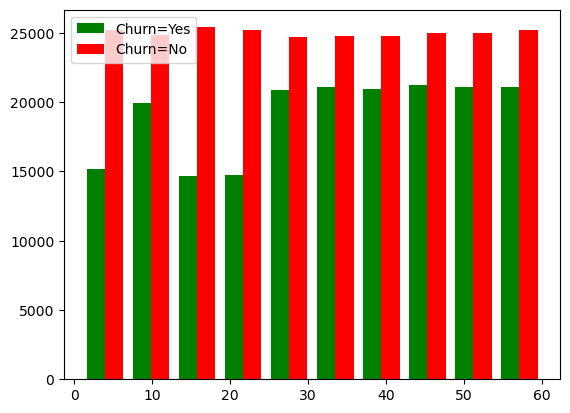

In [13]:
tenure_churn_no = churn[churn.Churn==0].Tenure
tenure_churn_yes = churn[churn.Churn==1].Tenure

plt.hist([tenure_churn_no, tenure_churn_yes], color=['green', 'red'], label=['Churn=Yes', 'Churn=No'])
plt.legend()

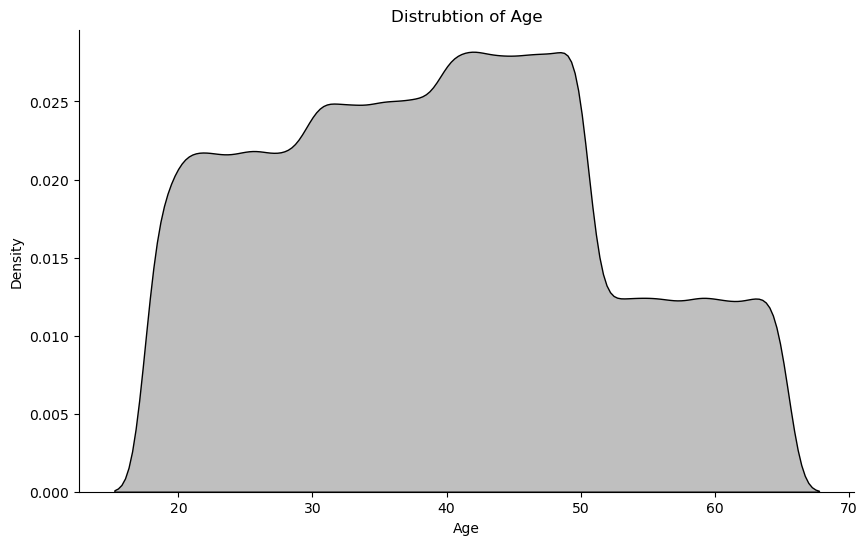

In [14]:
plt.figure(figsize=(10,6))
sns.kdeplot(data=churn_cleaned, x='Age', fill=True, color='black')
plt.title('Distrubtion of Age')
sns.despine()

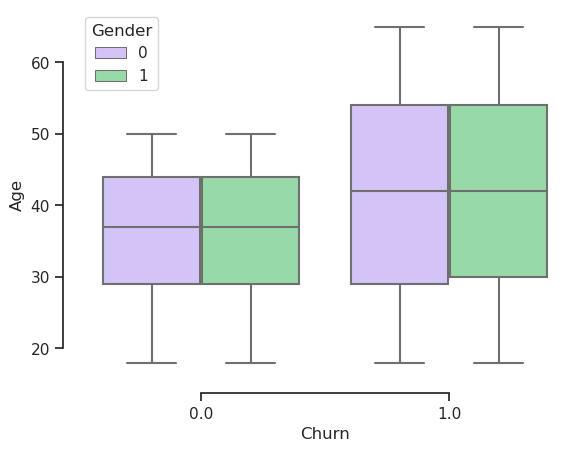

In [15]:
sns.set_theme(style="ticks", palette="pastel")
sns.boxplot(x="Churn", y="Age",
            hue="Gender", palette=["m", "g"],
            data=churn_cleaned)
sns.despine(offset=10, trim=True)

# BUILDING A MODEL

In [16]:
#First let's define our X and y
X = churn_cleaned.drop('Churn', axis=1)
y = churn_cleaned['Churn']



In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) #Use train test split

In [18]:
#Let's scale our data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)


In [19]:
X_train.shape

(308582, 14)

In [20]:
#Let's create our ANN model
model = keras.Sequential([
    keras.layers.Dense(3000, input_shape=(14,), activation='relu'),
    keras.layers.Dense(2500, activation='relu'),
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

In [21]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [23]:
model.fit(X_train, y_train, epochs=30)

Epoch 1/30
9644/9644 [==============================] - 47s 5ms/step - loss: 0.0205 - accuracy: 0.9932
Epoch 2/30
9644/9644 [==============================] - 47s 5ms/step - loss: 0.0200 - accuracy: 0.9934
Epoch 3/30
9644/9644 [==============================] - 47s 5ms/step - loss: 0.0184 - accuracy: 0.9940
Epoch 4/30
9644/9644 [==============================] - 47s 5ms/step - loss: 0.0173 - accuracy: 0.9943
Epoch 5/30
9644/9644 [==============================] - 47s 5ms/step - loss: 0.0172 - accuracy: 0.9944
Epoch 6/30
9644/9644 [==============================] - 47s 5ms/step - loss: 0.0156 - accuracy: 0.9948
Epoch 7/30
9644/9644 [==============================] - 47s 5ms/step - loss: 0.0156 - accuracy: 0.9948
Epoch 8/30
9644/9644 [==============================] - 47s 5ms/step - loss: 0.0150 - accuracy: 0.9952
Epoch 9/30
9644/9644 [==============================] - 47s 5ms/step - loss: 0.0148 - accuracy: 0.9952
Epoch 10/30
9644/9644 [==============================] - 47s 5ms/step - l

In [24]:
model.evaluate(X_test, y_test)

4133/4133 [==============================] - 12s 3ms/step - loss: 0.0122 - accuracy: 0.9950


[0.012183211743831635, 0.9949716329574585]

In [25]:
y_predict = model.predict(X_test)

4133/4133 [==============================] - 8s 2ms/step


In [26]:
y_predict[0:5]

array([[1.000000e+00],
       [1.000000e+00],
       [1.000000e+00],
       [1.000000e+00],
       [1.661186e-04]], dtype=float32)

In [27]:
y_test[:5]

159565    1.0
127464    1.0
22398     1.0
99337     1.0
300997    0.0
Name: Churn, dtype: float64

In [28]:
y_pred_num =[]
for element in y_predict:
    if element > 0.5:
        y_pred_num.append(1)
    else:
        y_pred_num.append(0)
        

In [29]:
y_pred_num[0:5]

[1, 1, 1, 1, 0]

In [31]:
y_test[:5]

159565    1.0
127464    1.0
22398     1.0
99337     1.0
300997    0.0
Name: Churn, dtype: float64

In [33]:
print(classification_report(y_test, y_pred_num))

              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99     57160
         1.0       0.99      1.00      1.00     75090

    accuracy                           0.99    132250
   macro avg       1.00      0.99      0.99    132250
weighted avg       0.99      0.99      0.99    132250



Text(91.25, 0.5, 'Truth')

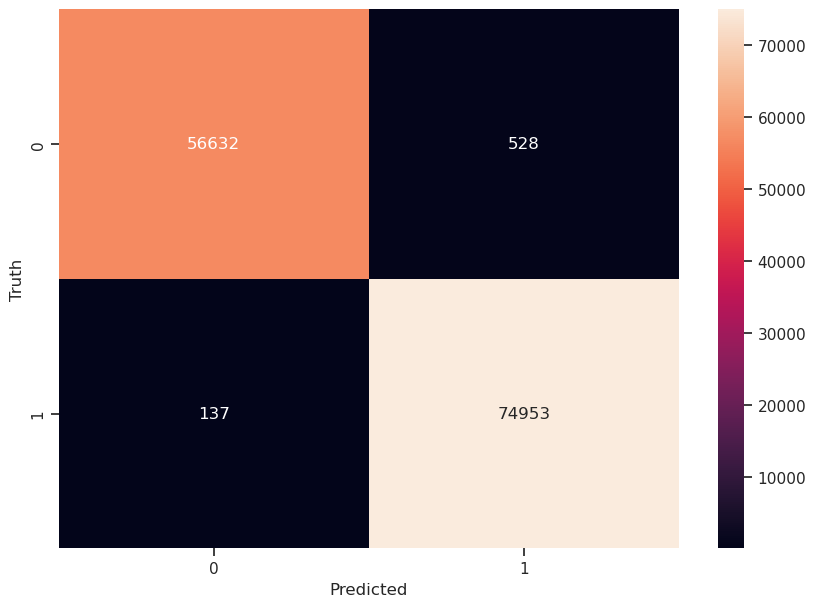

In [34]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_num)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')